### Dependencies

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as p

In [2]:
DEFAULT_FILTER = cv.COLOR_BGR2GRAY

### Image to Gray

In [ ]:
WIN_NAME = "img2gray"

def im2gray(path: str) -> None:
    try:
        src = cv.imread(path)
        
        if src is None:  
            raise FileNotFoundError(f"Image not found at path: {path}")
        
        img = cv.cvtColor(src, DEFAULT_FILTER)
        cv.imshow(WIN_NAME, img)
        cv.waitKey(0)
        cv.imwrite(f'{path}-2gray.png', img)
    except FileNotFoundError as e:
        print(f"Something went wrong: {e}")

In [ ]:
SRC = "./assets/ford.png"

im2gray(SRC)

### Canny

In [3]:
cam = cv.VideoCapture(0)

if not cam.isOpened():
    print('Camera not found')
    exit()

while True:
    _, frame = cam.read()

    edges = cv.Canny(cv.cvtColor(frame, cv.COLOR_BGR2GRAY), 50, 200)

    cv.imshow('Result', frame)
    cv.imshow('Canny', edges)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()
cv.destroyAllWindows()

### HSV

In [24]:
class HSVColor:
    def __init__(self, lower: np.ndarray, upper: np.ndarray):
        self.lower = lower
        self.upper = upper

    def apply(self, image: np.ndarray) -> np.ndarray:
        hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
        return cv.inRange(hsv, self.lower, self.upper)

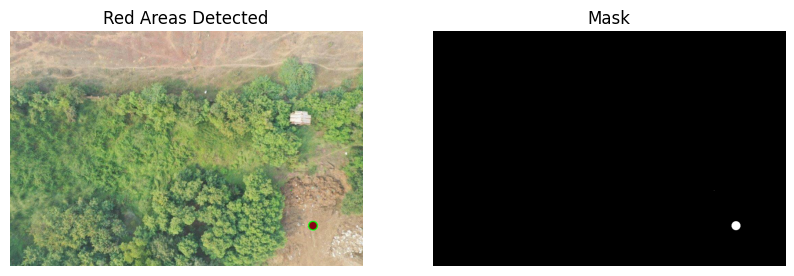

In [29]:
image = cv.imread("./assets/default-pic.png")
redRange1 = HSVColor(np.array([0, 120, 70]), np.array([10, 255, 255]))
redRange2 = HSVColor(np.array([170, 120, 70]), np.array([180, 255, 255]))
redMask1 = redRange1.apply(image)
redMask2 = redRange2.apply(image)
redMask = redMask1 + redMask2
contours, _ = cv.findContours(redMask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 2)

fig, axs = p.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  
axs[0].set_title('Red Areas Detected')
axs[0].axis('off')
axs[1].imshow(redMask, cmap='gray')
axs[1].set_title('Mask')
axs[1].axis('off')
p.show()